# Finance Data Analysis

To examine how different banks' stocks react during the pre to post pandemic. And whether there are any correlations amongst these banks.

In [74]:
from pandas_datareader import data, wb
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [75]:
start = dt.datetime(2019, 12, 31)
end = dt.date.today()

In [76]:
BAC = web.DataReader("BAC", 'yahoo', start, end)
#CitiGroup
C = web.DataReader("C", 'yahoo', start, end)
#Goldman
GS = web.DataReader("GS", 'yahoo', start, end)
#JP Morgan
JPM = web.DataReader("JPM", 'yahoo', start, end)
#Morgan Stanley
MS = web.DataReader("MS", 'yahoo', start, end)
#Wells Fargo
WFC = web.DataReader("WFC", 'yahoo', start, end)

In [77]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [78]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [79]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [80]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2019-12-30   35.650002  35.090000  35.570000  35.150002  30705100.0   
2019-12-31   35.259998  34.970001  35.029999  35.220001  29630100.0   
2020-01-02   35.660000  35.290001  35.349998  35.639999  37614200.0   
2020-01-03   35.150002  34.759998  34.980000  34.900002  50357900.0   
2020-01-06   34.900002  34.369999  34.410000  34.849998  42185000.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2019-12-30   33.747036  80.419998  79.339996  80.150002  79.510002  ...   
2019-12-31   33.814243  79.940002  79.099998  79.320000  79.889999  ...   
2020-01-02   34.217472  81.260002  80.029999  80.129997  81.230003  ...   
2020-01-03   33.507011  80.519997  79.449997  79.800003  79.699997  ...   
2020-01-06   33.459003  79.550003  78.720001  78.720001  79.449997  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2019-12-30   51.360001  50.959999  4532800.0  48.653873  54.259998  53.500000   
2019-12-31   50.959999  51.119999  5131600.0  48.806622  53.820000  53.459999   
2020-01-02   51.200001  52.040001  7808000.0  49.684990  54.040001  53.509998   
2020-01-03   51.220001  51.200001  6706000.0  48.883007  53.619999  52.900002   
2020-01-06   50.669998  51.020000  7476700.0  48.711143  53.200001  52.720001   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2019-12-30   54.169998  53.599998  10900500.0  51.031933  
2019-12-31   53.529999  53.799999  12566000.0  51.222359  
2020-01-02   53.849998  53.750000  16803100.0  51.174751  
2020-01-03   53.110001  53.419998  15608800.0  50.860561  
2020-01-06   52.740002  53.099998  13200300.0  50.555893  

[5 rows x 36 columns]

<Strong>Max Close price for each bank's stock throughout the covid</Strong>

In [81]:
for tick in tickers:
    print(tick, round(bank_stocks[tick]["Close"].max(),2))
    
#OR 

#bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

BAC 43.27
C 81.91
GS 419.69
JPM 166.44
MS 105.45
WFC 53.8


In [82]:
returns = pd.DataFrame()

In [83]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [84]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,0.001991,0.004779,0.000566,0.005554,0.003140,0.003731
2020-01-02,0.011925,0.016773,0.019093,0.012123,0.017997,-0.000929
2020-01-03,-0.020763,-0.018835,-0.011693,-0.019491,-0.016141,-0.006140
2020-01-06,-0.001433,-0.003137,0.010234,-0.000795,-0.003516,-0.005990


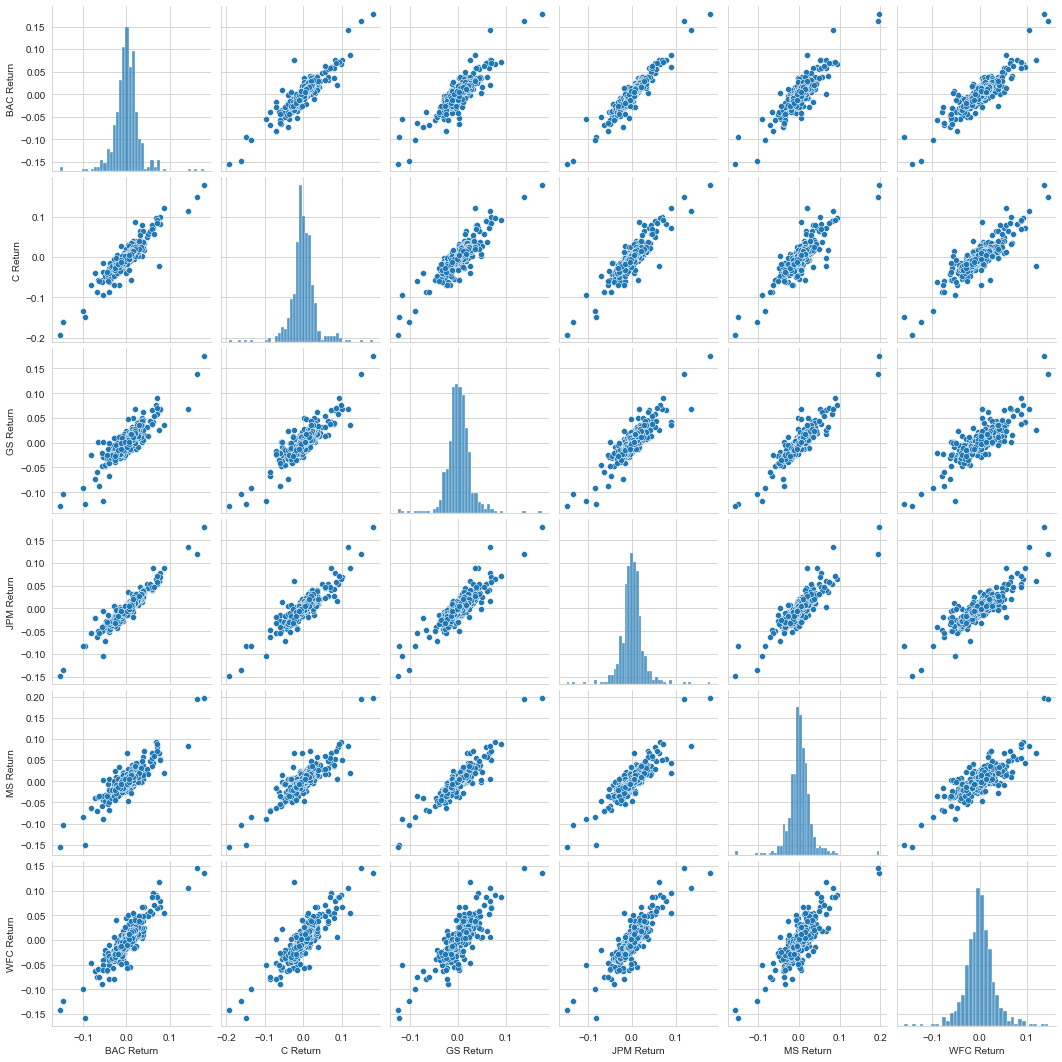

In [85]:
sns.pairplot(returns[1:])

#Overall, all companies have high degree of correlations with each other

<h2>Worst Drop during the period</h2>

In [86]:
returns.idxmin()

#Worst Drop for 5 companies happened on the same day

#Dow and US stocks plunge again: March 16, 2020

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [101]:
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

<strong>Riskiest company over the period:</strong>

In [87]:
returns.std()
#Citibank has highest sd, hence riskiest

BAC Return    0.030214
C Return      0.034478
GS Return     0.027236
JPM Return    0.027742
MS Return     0.029670
WFC Return    0.032857
dtype: float64

In [88]:
returns.loc['2020-01-01':'2020-12-31'].std()

BAC Return    0.036933
C Return      0.042502
GS Return     0.032929
JPM Return    0.034272
MS Return     0.036164
WFC Return    0.038573
dtype: float64

c:\users\ngchi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MS Return', ylabel='Density'>

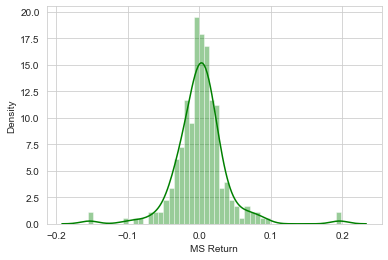

In [89]:
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['MS Return'],color='green',bins=50)

c:\users\ngchi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='C Return', ylabel='Density'>

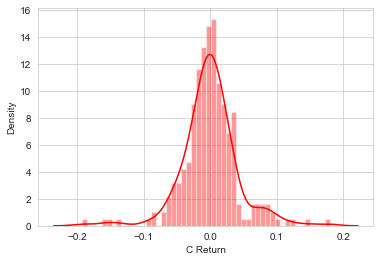

In [90]:
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['C Return'],color='red',bins=50)

In [91]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages against Close Price for BOA 2020

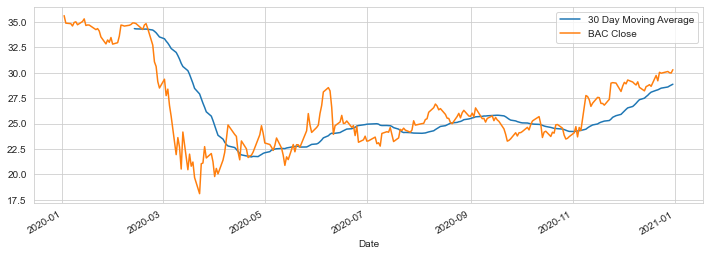

In [92]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2020-01-01':'2020-12-31'].rolling(window=30).mean().plot(label='30 Day Moving Average')
BAC['Close'].loc['2020-01-01':'2020-12-31'].plot(label='BAC Close')
plt.legend()

<h2>Heatmap of the correlation between the stocks Close Price</h2>

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

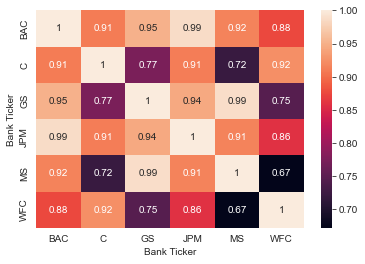

In [93]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

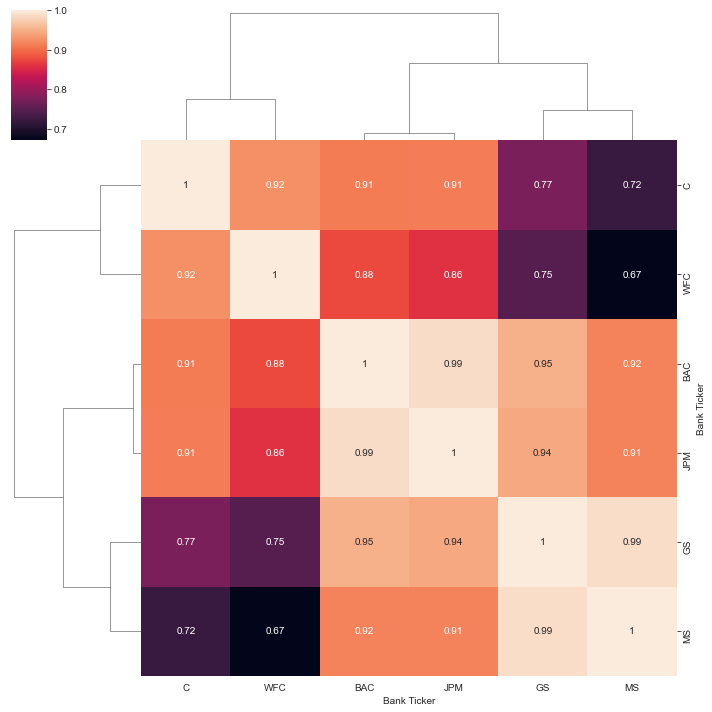

In [94]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [69]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [97]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

<h1>BOA Stocks via CandleStick from Jan 2020 to Dec 2020</h1>

In [98]:
bac20 = BAC[['Open','High','Low','Close']].loc['2020-01-01':'2020-12-31']
bac20.iplot(kind='candle')

<strong>Simple Moving Averages plot of Morgan Stanley for the year 2020</strong>

In [99]:
MS['Close'].loc['2020-01-01':'2020-12-31'].ta_plot(study='sma',periods=[13,21,55])

<Strong>Bollinger Band Plot for Bank of America for the year 2020</Strong>

In [100]:
BAC['Close'].loc['2020-01-01':'2020-12-31'].ta_plot(study='boll')

In [ ]:
#ALL banks have high degree of correlation with each other.
#Majority suffer worst drop during March 16, 2020 when the Dows and US Stocks plunged
#Majority gain the highest gain on 2020-03-13, and the live market has seen the biggest jump in 11 years. 